# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

### 1. Imports et Chargement du dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/el_pouleto/Desktop/Data_Visualization_Course/lab-sessions/datasets/athlete_events.csv")

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 2. Filtre pour garder que l'annnée 2016

In [10]:
df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notnull())]

### 3. Nombre de médailles par sport

In [11]:
medals_by_sport = df_2016['Sport'].value_counts()
display(medals_by_sport)

Sport
Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: co

### 4. Top 5 sport par nombre de médailles

In [12]:
top_5_sports = medals_by_sport.head(5).index.tolist()

df_top5 = df_2016[df_2016['Sport'].isin(top_5_sports)]

display(df_top5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265312,132776,Julius Kiplagat Yego,M,27.0,175.0,94.0,Kenya,KEN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Javelin Throw,Silver
267136,133648,Shelina Laura Zadorsky,F,23.0,172.0,67.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Bronze
268247,134211,Jos Carlos Cracco Neto,M,22.0,170.0,69.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,Gold
268944,134559,Zhang Wenxiu,F,30.0,183.0,105.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,Silver


### 5. Plot du nombre de médaille pour les 5 sport avec le plus de médailles

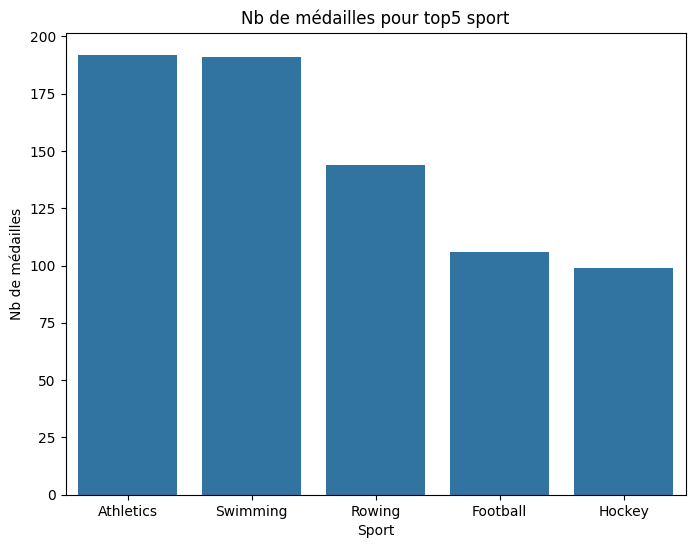

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_top5, x='Sport', order=top_5_sports)
plt.title("Nb de médailles pour top5 sport")
plt.ylabel("Nb de médailles")
plt.show()

### 6. Histogramme distribution des age des médaillés des Top5 sport

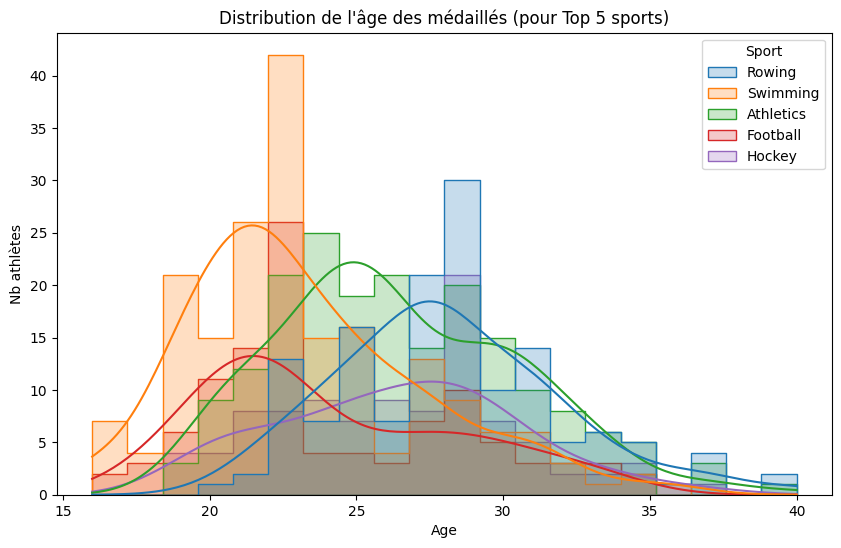

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_top5, x='Age', hue='Sport', element='step', bins=20, kde=True)
plt.title("Distribution de l'âge des médaillés (pour Top 5 sports)")
plt.xlabel("Age")
plt.ylabel("Nb athlètes")
plt.show()

### 7. Bar plot du nombre de médailles par pays pour les 5 sports

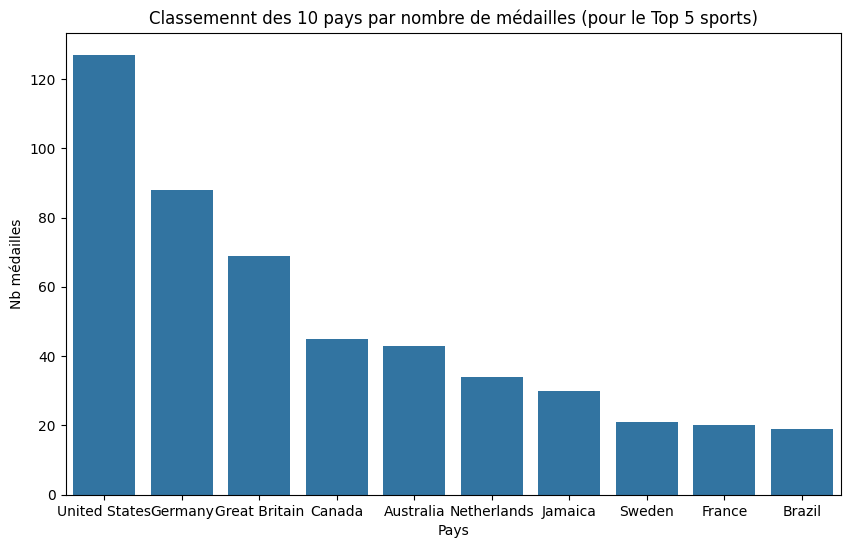

In [15]:
medals_by_country = df_top5['Team'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=medals_by_country.index, y=medals_by_country.values)
plt.title("Classemennt des 10 pays par nombre de médailles (pour le Top 5 sports)")
plt.xlabel("Pays")
plt.ylabel("Nb médailles")
plt.show()

### 8. Bar plot du poids moyen par sexe pour les 5 sports

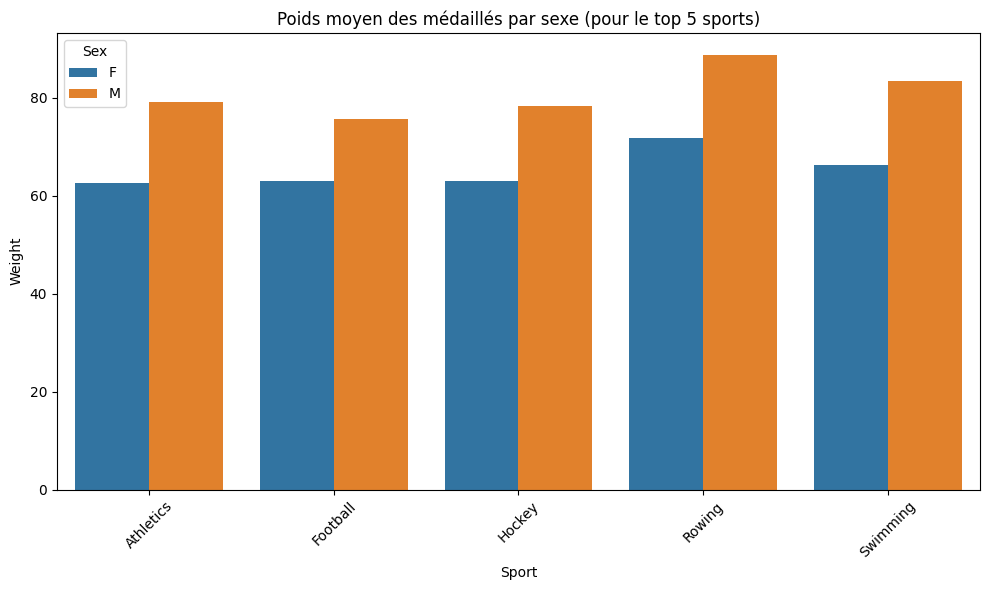

In [16]:
avg_weight = df_top5.dropna(subset=['Weight']).groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_weight, x='Sport', y='Weight', hue='Sex')
plt.title("Poids moyen des médaillés par sexe (pour le top 5 sports)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()